In [1]:
from pyedhrec import EDHRec

edhrec = EDHRec()

In [21]:
import json

commander = "Wilhelt, the Rotcleaver"

combosJson = edhrec.get_card_combos(commander)

rawCombos = combosJson["container"]["json_dict"]["cardlists"]

print(json.dumps(rawCombos, indent=4))

[
    {
        "cardviews": [
            {
                "name": "Gravecrawler",
                "sanitized": "gravecrawler",
                "sanitized_wo": "gravecrawler",
                "url": "/combos/ub/2438-2452-2577"
            },
            {
                "name": "Rooftop Storm",
                "sanitized": "rooftop-storm",
                "sanitized_wo": "rooftop-storm",
                "url": "/combos/ub/2438-2452-2577"
            },
            {
                "name": "Carrion Feeder",
                "sanitized": "carrion-feeder",
                "sanitized_wo": "carrion-feeder",
                "url": "/combos/ub/2438-2452-2577"
            }
        ],
        "header": "Gravecrawler + Rooftop Storm + Carrion Feeder (17983 decks)",
        "tag": "gravecrawler+rooftopstorm+carrionfeeder(17983decks)",
        "href": "/combos/ub/2438-2452-2577"
    },
    {
        "cardviews": [
            {
                "name": "Gravecrawler",
                "sanitized

In [76]:
import re

combos = []

for rawCombo in rawCombos:
    combos.append(
        {
            'name' : rawCombo['header'].split(' (')[0],
            'cards': [
                {
                    'slug': card['sanitized'], 
                    'name': card['name']
                } for card in rawCombo['cardviews']
            ],
            'decks': int(
                re.search(
                    r'\((\d+) decks\)', 
                    rawCombo['header']
                ).group(1)
            )
        }
    )

maxPopularity = max([combo['decks'] for combo in combos])
for combo in combos:
    combo['decks'] = combo['decks']
    combo['popularity'] = combo['decks'] / maxPopularity

In [79]:
from tabulate import tabulate
import pandas as pd

combosDf = pd.DataFrame(combos)
combosDf = combosDf[['name', 'decks', 'popularity']]
combosDf = combosDf.sort_values(by='popularity', ascending=False)

print(f"Number of Combos: {len(combos)}")
print(tabulate(combosDf, headers='keys', tablefmt='github'))

Number of Combos: 100
|    | name                                                                                 |   decks |   popularity |
|----|--------------------------------------------------------------------------------------|---------|--------------|
| 91 | Hullbreaker Horror + Sol Ring                                                        |  149640 |  1           |
| 56 | Demonic Consultation + Thassa's Oracle                                               |   86777 |  0.579905    |
| 75 | Exquisite Blood + Sanguine Bond                                                      |   77117 |  0.51535     |
| 68 | Tainted Pact + Thassa's Oracle                                                       |   76519 |  0.511354    |
| 76 | Bolas's Citadel + Sensei's Divining Top + Aetherflux Reservoir                       |   33327 |  0.222715    |
|  1 | Gravecrawler + Phyrexian Altar                                                       |   29467 |  0.196919    |
|  0 | Gravecrawler + Roof

In [82]:
uniqueCards = set()
combosPerCard = {}

for combo in combos:
    for card in combo['cards']:
        uniqueCards.add(tuple(card.items()))
        
        if card['slug'] not in combosPerCard:
            combosPerCard[card['slug']] = 0

        combosPerCard[card['slug']] += 1

uniqueCards = [dict(card) for card in uniqueCards]

maxCombos = max(combosPerCard.values())

for card in uniqueCards:
    card['combos'] = combosPerCard[card['slug']]
    card['popularity'] = card['combos'] / maxCombos

In [83]:
from tabulate import tabulate
import pandas as pd

uniqueCardsDf = pd.DataFrame(uniqueCards)
uniqueCardsDf = uniqueCardsDf[['name', 'combos', 'popularity']]
uniqueCardsDf = uniqueCardsDf.sort_values(by='popularity', ascending=False)

print(f"Number of Unique Cards Used in Combos: {len(uniqueCards)}")
print(tabulate(uniqueCardsDf, headers='keys', tablefmt='github'))

Number of Unique Cards Used in Combos: 64
|    | name                           |   combos |   popularity |
|----|--------------------------------|----------|--------------|
| 10 | Rooftop Storm                  |       30 |    1         |
| 26 | Ashnod's Altar                 |       22 |    0.733333  |
| 32 | Gravecrawler                   |       20 |    0.666667  |
| 42 | Mikaeus, the Unhallowed        |       14 |    0.466667  |
| 16 | Carrion Feeder                 |       14 |    0.466667  |
| 56 | Liliana, Untouched by Death    |       13 |    0.433333  |
| 30 | Phyrexian Altar                |       12 |    0.4       |
| 20 | Altar of Dementia              |       11 |    0.366667  |
| 39 | Wilhelt, the Rotcleaver        |       11 |    0.366667  |
|  3 | Putrid Goblin                  |        9 |    0.3       |
|  2 | Poppet Stitcher                |        9 |    0.3       |
| 50 | Warren Soultrader              |        8 |    0.266667  |
| 38 | Viscera Seer               

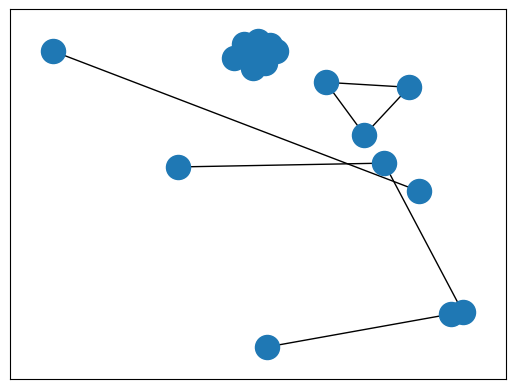

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.Graph()

for card in uniqueCards:
    graph.add_node(card['slug'], name=card['name'], size=card['popularity'])

for combo in combos:
    for card in combo['cards']:
        for otherCard in combo['cards']:
            if card != otherCard:
                graph.add_edge(card['slug'], otherCard['slug'], weight=combo['popularity'])

pos = nx.kamada_kawai_layout(graph)

nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos)

plt.show()